# planar_arm.ipynb
The place to test equations for the planar arm

## Muscle geometry initialization
The planar arm has 6 muscles and 12 insertion points. The geometry is described by specifying the coordinates for all the insertion points when the arm is at a reference position. This, together with the coordinates of the elbow and the hand fully describe the arm's geometry.

In the reference position the upper arm is aligned with the x axis (e.g. $\theta_1 = 0$) and the forearm is aligned with the y axis ($\theta_2 = \pi/2$).
 

In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
## Coordinates for elbow and hand in the reference position
# shoulder is at origin. Length units are meters.
c_shoulder = (0., 0.)
c_elbow = (0.3, 0.)
c_hand = (0.3, 0.3)
## Insertion point coordinates
# biarticular biceps (muscle 1)
i1 = (0., 0.03)  # proximal insertion point
i2 = (0.29, 0.04) # distal insertion point
# anterior deltoid, pectoral (muscle 2)
i3 = (0., 0.04)
i4 = (.1, 0.02)
# posterior deltoid (muscle 3)
i5 = (0., -.04)
i6 = (.1, -0.02)
# biarticular triceps (muscle 4)
i7 = (0., -0.03)
i8 = (.3, -0.03)
# brachialis (muscle 5)
i9 = (0.2, 0.02)
i10 = (0.29, 0.04)
# monoarticular triceps (muscle 6)
i11 = (0.2, -0.02)
i12 =(0.3, -0.03)

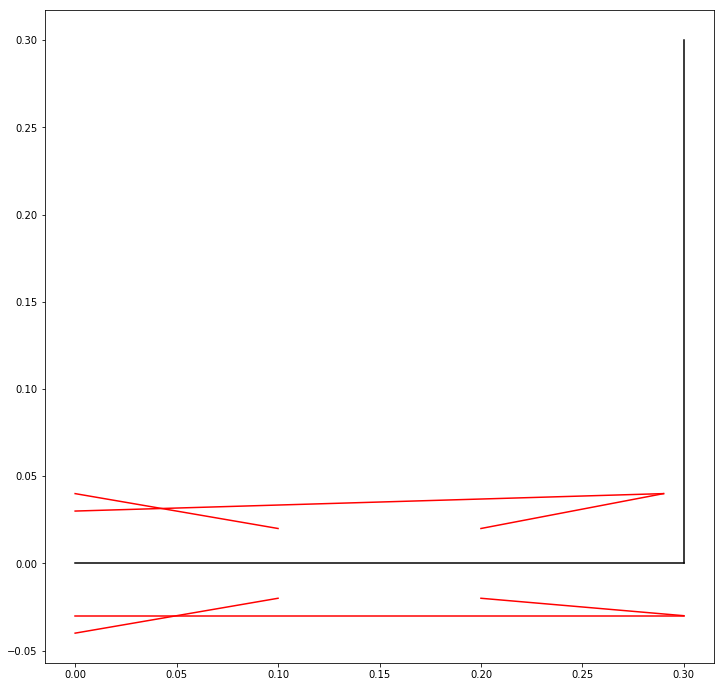

In [3]:
# plot the arm
fig = plt.figure(figsize = (12,12))
# upper arm and forearm
plt.plot([c_shoulder[0], c_elbow[0]], [c_shoulder[1],c_elbow[1]], 'k')
plt.plot([c_elbow[0], c_hand[0]], [c_elbow[1], c_hand[0]], 'k')
# insertion points
points = [i1,i2,i3,i4,i5,i6,i7,i8,i9,i10,i11,i12]
x_coords = [i[0] for i in points]
y_coords = [i[1] for i in points]
for idx in range(0,12,2):
    plt.plot(x_coords[idx:idx+2], y_coords[idx:idx+2], 'r')
plt.show()

## Torque produced by each muscle given its tension
For each muscle, given a Tension $T$, produce the torque $\tau$ it produces with respect to either the shoulder or the elbow axis.

In [4]:
T = 1.

def shoulder_torque(i_prox, i_dist, T):
    """ Obtain the torque produced by a muscle wrt the shoulder joint.
    
        Args:
            i_prox : coordinates of proximal insertion point (tuple)
            i_dist : coordinates of distal insertion point (tuple)
            T : muscle tension
        Returns:
            float
    """
    v = np.array([i_prox[0] - i_dist[0], i_prox[1] - i_dist[1]])
    v_norm = (sum(v*v))**(1./2.)
    F = (T/v_norm) * v
    tau = i_dist[0] * F[1] - i_dist[1] * F[0]
    return tau

def elbow_torque(i_prox, i_dist, T):
    """ Obtain the torque produced by a muscle wrt the shoulder joint.
    
        Args:
            i_prox : coordinates of proximal insertion point (tuple)
            i_dist : coordinates of distal insertion point (tuple)
            T : muscle tension
        Returns:
            float
    """
    v = np.array([i_prox[0] - i_dist[0], i_prox[1] - i_dist[1]])
    v_norm = (sum(v*v))**(1./2.)
    F = (T/v_norm) * v
    tau = (i_dist[0]-c_elbow[0]) * F[1] - (i_dist[1]-c_elbow[1]) * F[0]
    return tau

#ip = [np.array(p) for p in points]
# muscle 1 wrt shouler
tau1s = shoulder_torque(i1, i2, T)
# muscle 1 wrt elbow
tau1e = elbow_torque(i1, i2, T)
# muscle 2 wrt shoulder
tau2s = shoulder_torque(i3, i4, T)
# muscle 3 wrt shoulder
tau3s = shoulder_torque(i5, i6, T)
# muscle 4 wrt shouler
tau4s = shoulder_torque(i7, i8, T)
# muscle 4 wrt elbow
tau4e = elbow_torque(i7, i8, T)
# muscle 5 wrt elbow
tau5e = elbow_torque(i9, i10, T)
# muscle 6 wrt elbow
tau6e = elbow_torque(i11, i12, T)

tau_shoulder = tau1s + tau2s + tau3s + tau4s
tau_elbow = tau1e + tau4e + tau5e + tau6e

In [5]:
tau_elbow

0.021686534011786298